In [7]:
#1.Implement and demonstrate the FIND-S algorithm for finding the most specific
  #hypothesis based on a given set of training data samples. Read the training data from a CSV file
import csv
def loadCsv(filename):
    lines = csv.reader(open(filename, "r"))
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = dataset[i]
    return dataset
attributes = ['Sky','Temp','Humidity','Wind','Water','Forecast']
print('Attributes =',attributes)
num_attributes = len(attributes)
filename = "C:/Users/sjcet/Gskd/MLLab/play_tennis.csv"
dataset = loadCsv(filename)
print(dataset)
hypothesis=['0'] * num_attributes
print("Intial Hypothesis")
print(hypothesis)
print("The Hypothesis are")
for i in range(len(dataset)):
    target = dataset[i][-1]
    if(target == 'Yes'):
        for j in range(num_attributes):
            if(hypothesis[j]=='0'):
                hypothesis[j] = dataset[i][j]
            if(hypothesis[j]!= dataset[i][j]):
                hypothesis[j]='?'
        print(i+1,'=',hypothesis)
print("Final Hypothesis")
print(hypothesis)

Attributes = ['Sky', 'Temp', 'Humidity', 'Wind', 'Water', 'Forecast']
[['day', 'outlook', 'temp', 'humidity', 'wind', 'play'], ['D1', 'Sunny', 'Hot', 'High', 'Weak', 'No'], ['D2', 'Sunny', 'Hot', 'High', 'Strong', 'No'], ['D3', 'Overcast', 'Hot', 'High', 'Weak', 'Yes'], ['D4', 'Rain', 'Mild', 'High', 'Weak', 'Yes'], ['D5', 'Rain', 'Cool', 'Normal', 'Weak', 'Yes'], ['D6', 'Rain', 'Cool', 'Normal', 'Strong', 'No'], ['D7', 'Overcast', 'Cool', 'Normal', 'Strong', 'Yes'], ['D8', 'Sunny', 'Mild', 'High', 'Weak', 'No'], ['D9', 'Sunny', 'Cool', 'Normal', 'Weak', 'Yes'], ['D10', 'Rain', 'Mild', 'Normal', 'Weak', 'Yes'], ['D11', 'Sunny', 'Mild', 'Normal', 'Strong', 'Yes'], ['D12', 'Overcast', 'Mild', 'High', 'Strong', 'Yes'], ['D13', 'Overcast', 'Hot', 'Normal', 'Weak', 'Yes'], ['D14', 'Rain', 'Mild', 'High', 'Strong', 'No']]
Intial Hypothesis
['0', '0', '0', '0', '0', '0']
The Hypothesis are
4 = ['D3', 'Overcast', 'Hot', 'High', 'Weak', 'Yes']
5 = ['?', '?', '?', 'High', 'Weak', 'Yes']
6 = ['?'

In [8]:
#1. Implement and demonstrate the FIND-S algorithm for finding the most specific
    #hypothesis based on a given set of training data samples. Read the training data from a CSV file
import random
import csv
def read_data(filename):
    with open(filename, 'r') as csvfile:
        datareader = csv.reader(csvfile, delimiter=',')
        traindata = []
        for row in datareader:
            traindata.append(row)
    return (traindata)

h=['phi','phi','phi','phi','phi','phi']
data=read_data("C:/Users/sjcet/Gskd/MLLab/play_tennis.csv")
def isConsistent(h,d):
    if len(h)!=len(d)-1:
        print('Number of attributes are not same in hypothesis.')
        return False
    else:
        matched=0
        for i in range(len(h)):
            if ( (h[i]==d[i]) | (h[i]=='any') ):
                matched=matched+1
            if matched==len(h):
                return True
            else:
                return False
def makeConsistent(h,d):
    for i in range(len(h)):
        if((h[i] == 'phi')):
            h[i]=d[i]
        elif(h[i]!=d[i]):
            h[i]='any'
    return h
print('Begin : Hypothesis :',h)
print('==========================================')
for d in data:
    if d[len(d)-1]=='Yes':
        if ( isConsistent(h,d)):
            pass
        else:
            h=makeConsistent(h,d)
    print ('Training data :',d)
    print ('Updated Hypothesis :',h)
    print()
    print(' ')
print('==========================================')
print('maximally sepcific data set End: Hypothesis :',h)

Begin : Hypothesis : ['phi', 'phi', 'phi', 'phi', 'phi', 'phi']
Training data : ['day', 'outlook', 'temp', 'humidity', 'wind', 'play']
Updated Hypothesis : ['phi', 'phi', 'phi', 'phi', 'phi', 'phi']

 
Training data : ['D1', 'Sunny', 'Hot', 'High', 'Weak', 'No']
Updated Hypothesis : ['phi', 'phi', 'phi', 'phi', 'phi', 'phi']

 
Training data : ['D2', 'Sunny', 'Hot', 'High', 'Strong', 'No']
Updated Hypothesis : ['phi', 'phi', 'phi', 'phi', 'phi', 'phi']

 
Number of attributes are not same in hypothesis.
Training data : ['D3', 'Overcast', 'Hot', 'High', 'Weak', 'Yes']
Updated Hypothesis : ['D3', 'Overcast', 'Hot', 'High', 'Weak', 'Yes']

 
Number of attributes are not same in hypothesis.
Training data : ['D4', 'Rain', 'Mild', 'High', 'Weak', 'Yes']
Updated Hypothesis : ['any', 'any', 'any', 'High', 'Weak', 'Yes']

 
Number of attributes are not same in hypothesis.
Training data : ['D5', 'Rain', 'Cool', 'Normal', 'Weak', 'Yes']
Updated Hypothesis : ['any', 'any', 'any', 'any', 'Weak', 'Y

In [9]:
#2.For a given set of training data examples stored in a .CSV file, implement and
  #demonstrate the Candidate-Elimination algorithm to output a description of the set of all
  #hypotheses consistent with the training examples.
import numpy as np
import pandas as pd
data = pd.DataFrame(data=pd.read_csv("C:/Users/sjcet/Gskd/MLLab/play_tennis.csv"))
concepts = np.array(data.iloc[:,0:-1])
target = np.array(data.iloc[:,-1])
def learn(concepts, target):
    specific_h = concepts[0].copy()
    print("initialization of specific_h and general_h")
    print(specific_h)
    general_h = [["?" for i in range(len(specific_h))] for i in range(len(specific_h))]
    print(general_h)
    for i, h in enumerate(concepts):
        if target[i] == "Yes":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
    if target[i] == "No":
        for x in range(len(specific_h)):
            if h[x] != specific_h[x]:
                general_h[x][x] = specific_h[x]
            else:
                general_h[x][x] = '?'
    print(" steps of Candidate Elimination Algorithm",i+1)
    print("specific_h ",i+1,"\n ")
    print(specific_h)
    print("general_h ", i+1, "\n ")
    print(general_h)
    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    return specific_h, general_h
s_final, g_final = learn(concepts, target)
print("Final Specific_h:", s_final, sep="\n")
print("Final General_h:", g_final, sep="\n")

initialization of specific_h and general_h
['D1' 'Sunny' 'Hot' 'High' 'Weak']
[['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?']]
 steps of Candidate Elimination Algorithm 14
specific_h  14 
 
['?' '?' '?' '?' '?']
general_h  14 
 
[['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?']]
Final Specific_h:
['?' '?' '?' '?' '?']
Final General_h:
[['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?']]


In [10]:
import numpy as np
# Define a simple dataset with binary attributes
data = [
    ['Sunny', 'Hot', 'High', 'Weak', 'No'],
    ['Sunny', 'Hot', 'High', 'Strong', 'No'],
    ['Overcast', 'Hot', 'High', 'Weak', 'Yes'],
    ['Rain', 'Mild', 'High', 'Weak', 'Yes'],
    ['Rain', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Cool', 'Normal', 'Strong', 'No'],
    ['Overcast', 'Cool', 'Normal', 'Strong', 'Yes'],
    ['Sunny', 'Mild', 'High', 'Weak', 'No'],
    ['Sunny', 'Cool', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Mild', 'Normal', 'Weak', 'Yes'],
    ['Sunny', 'Mild', 'Normal', 'Strong', 'Yes'],
    ['Overcast', 'Mild', 'High', 'Strong', 'Yes'],
    ['Overcast', 'Hot', 'Normal', 'Weak', 'Yes'],
    ['Rain', 'Mild', 'High', 'Strong', 'No']
]
# Define the attributes and the target variable
attributes = ['Outlook', 'Temperature', 'Humidity', 'Wind']
target_attribute = 'PlayTennis'
# Function to calculate entropy of a dataset
def entropy(dataset):
    labels = [row[-1] for row in dataset]
    unique_labels, label_counts = np.unique(labels, return_counts=True)
    probabilities = label_counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy
# Function to calculate information gain for an attribute
def information_gain(dataset, attribute):
    entropy_before_split = entropy(dataset)
    values = np.unique([row[attributes.index(attribute)] for row in dataset])
    weighted_entropy_after_split = 0
    for value in values:
        subset = [row for row in dataset if row[attributes.index(attribute)] == value]
        weight = len(subset) / len(dataset)
        weighted_entropy_after_split += weight * entropy(subset)
    information_gain = entropy_before_split - weighted_entropy_after_split
    return information_gain
# Function to select the best attribute for splitting
def select_best_attribute(dataset, attributes):
    information_gains = [(attribute, information_gain(dataset, attribute)) for attribute in attributes]
    best_attribute = max(information_gains, key=lambda x: x[1])[0]
    return best_attribute
# Function to build the decision tree
def build_decision_tree(dataset, attributes):
    labels = [row[-1] for row in dataset]
    # If all labels are the same, return that label
    if len(set(labels)) == 1:
        return labels[0]
    # If there are no attributes left, return the majority label
    if len(attributes) == 0:
        unique_labels, label_counts = np.unique(labels, return_counts=True)
        majority_label = unique_labels[np.argmax(label_counts)]
        return majority_label
    # Otherwise, select the best attribute for splitting
    best_attribute = select_best_attribute(dataset, attributes)
    tree = {best_attribute: {}}
    # Remove the best attribute from the list of attributes
    remaining_attributes = [attr for attr in attributes if attr != best_attribute]
    # Recursively build the subtree for each value of the best attribute
    for value in np.unique([row[attributes.index(best_attribute)] for row in dataset]):
        subset = [row for row in dataset if row[attributes.index(best_attribute)] == value]
        subtree = build_decision_tree(subset, remaining_attributes)
        tree[best_attribute][value] = subtree
    return tree
# Function to classify a new sample using the decision tree
def classify(tree, sample):
    if isinstance(tree, dict):
        attribute = list(tree.keys())[0]
        value = sample[attributes.index(attribute)]
        if value in tree[attribute]:
            return classify(tree[attribute][value], sample)
        else:
            return "Unknown"
    else:
        return tree
# Build the decision tree
decision_tree = build_decision_tree(data, attributes)
# Classify a new sample
new_sample = ['Sunny', 'Hot', 'High', 'Weak']
result = classify(decision_tree, new_sample)
print(f"Prediction for {new_sample}: {result}")

Prediction for ['Sunny', 'Hot', 'High', 'Weak']: Unknown


In [2]:
pip install dataloader

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for dataloader: filename=dataloader-2.0-py3-none-any.whl size=10092 sha256=4e991704ff84c8682c249b19f815ebce0c5142685b82f0c5b28fb32ab2eaf6d2
  Stored in directory: c:\users\sjcet\appdata\local\pip\cache\wheels\c7\b4\28\bf711e4f9bf69d9fc21b1c017d9b63eb13c3a6f35308088a0b
Successfully built dataloader
Note: you may need to restart the kernel to use updated packages.


In [3]:
#3.Write a program to demonstrate the working of the decision tree based ID3 algorithm.
  #Use an appropriate data set for building the decision tree and apply this knowledge to 
  #classify a new sample.#3.3. Write a program to demonstrate the working of the decision tree based ID3 algorithm.
  #Use an appropriate data set for building the decision tree and apply this knowledge to
  #classify a new sample.
import numpy as np
import math
from dataloader import read_data
class Node:
    def init (self, attribute):
        self.attribute = attribute
        self.children = []
        self.answer = ""
    def str (self):
        return self.attribute
def subtables(data, col, delete):
    dict = {}
    items = np.unique(data[:, col])
    count = np.zeros((items.shape[0], 1), dtype=np.int32)
    for x in range(items.shape[0]):
        for y in range(data.shape[0]):
            if data[y, col] == items[x]:
                count[x] += 1
    for x in range(items.shape[0]):
        dict[items[x]] = np.empty((int(count[x]), data.shape[1]), dtype="|S32")
        pos = 0
        for y in range(data.shape[0]):
            if data[y, col] == items[x]:
                dict[items[x]][pos] = data[y]
                pos += 1
        if delete:
            dict[items[x]] = np.delete(dict[items[x]], col, 1)
    return items, dict
def entropy(S):
    items = np.unique(S)
    if items.size == 1:
        return 0
    counts = np.zeros((items.shape[0], 1))
    sums = 0
    for x in range(items.shape[0]):
        counts[x] = sum(S == items[x]) / (S.size * 1.0)
    for count in counts:
        sums += -1 * count * math.log(count, 2)
    return sums
def gain_ratio(data, col):
    items, dict = subtables(data, col, delete=False)
    total_size = data.shape[0]
    entropies = np.zeros((items.shape[0], 1))
    intrinsic = np.zeros((items.shape[0], 1))
    for x in range(items.shape[0]):
        ratio = dict[items[x]].shape[0]/(total_size * 1.0)
        entropies[x] = ratio * entropy(dict[items[x]][:, -1])
        intrinsic[x] = ratio * math.log(ratio, 2)
    total_entropy = entropy(data[:, -1])
    iv = -1 * sum(intrinsic)
    for x in range(entropies.shape[0]):
        total_entropy -= entropies[x]
    return total_entropy / iv
def create_node(data, metadata):
    #TODO: Co jeśli information gain jest zerowe?
    if (np.unique(data[:, -1])).shape[0] == 1:
        node = Node("")
        node.answer = np.unique(data[:, -1])[0]
        return node
    gains = np.zeros((data.shape[1] - 1, 1))
    for col in range(data.shape[1] - 1):
        gains[col] = gain_ratio(data, col)
    split = np.argmax(gains)
    node = Node(metadata[split])
    metadata = np.delete(metadata, split, 0)
    items, dict = subtables(data, split, delete=True)
    for x in range(items.shape[0]):
        child = create_node(dict[items[x]], metadata)
        node.children.append((items[x], child))
    return node
def empty(size):
    s = ""
    for x in range(size):
        s += " "
    return s
def print_tree(node, level):
    if node.answer != "":
        print(empty(level), node.answer)
    return
    print(empty(level), node.attribute)
    for value, n in node.children:
        print(empty(level + 1), value)
        print_tree(n, level + 2)
metadata, traindata = read_data("C:/Users/sjcet/Gskd/MLLab/play_tennis.csv")
data = np.array(traindata)
node = create_node(data, metadata)
print_tree(node, 0)

ImportError: cannot import name 'read_data_sets' from partially initialized module 'dataloader' (most likely due to a circular import) (C:\Users\sjcet\anaconda3\Lib\site-packages\dataloader\__init__.py)

In [6]:
#3. Write a program to demonstrate the working of the decision tree based ID3 algorithm.
   #Use an appropriate data set for building the decision tree and apply this knowledge to
   #classify a new sample.
import pandas as pd
import numpy as np
dataset= pd.read_csv("C:/Users/sjcet/Gskd/MLLab/play_tennis.csv",names=['outlook','temperature','humidity','wind','class',])
def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in
range(len(elements))])
    return entropy
def InfoGain(data,split_attribute_name,target_name="class"):
    total_entropy = entropy(data[target_name])
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    Weighted_Entropy =np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain
def ID3(data,originaldata,features,target_attribute_name="class",parent_node_class = None):
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
    elif len(features) ==0:
        return parent_node_class
    else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
    item_values = [InfoGain(data,feature,target_attribute_name) for feature in features] #Returnthe information gain values for the features in the dataset
    best_feature_index = np.argmax(item_values)
    best_feature = features[best_feature_index]
    tree = {best_feature:{}}
    features = [i for i in features if i != best_feature]
    for value in np.unique(data[best_feature]):
        value = value
        sub_data = data.where(data[best_feature] == value).dropna()
        subtree = ID3(sub_data,dataset,features,target_attribute_name,parent_node_class)
        tree[best_feature][value] = subtree
    return(tree)
tree = ID3(dataset,dataset,dataset.columns[:-1])
print(' \nDisplay Tree\n',tree)

 
Display Tree
 {'outlook': {'Overcast': 'Yes', 'Rain': {'wind': {'Strong': 'No', 'Weak': 'Yes'}}, 'Sunny': {'humidity': {'High': 'No', 'Normal': 'Yes'}}, 'outlook': 'play'}}


In [8]:
#4. Build an Artificial Neural Network by implementing the Back propagation Algorithm
   #and test the same using appropriate data sets
import numpy as np
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
X = X/np.amax(X,axis=0) # maximum of X array longitudinally y = y/100
#Sigmoid Function
def sigmoid (x):
    return (1/(1 + np.exp(-x)))
#Derivative of Sigmoid Function
def derivatives_sigmoid(x):
    return x * (1 - x)
#Variable initialization
epoch=7000 #Setting training iterations
lr=0.1 #Setting learning rate
inputlayer_neurons = 2 #number of features in data set
hiddenlayer_neurons = 3 #number of hidden layers neurons
output_neurons = 1 #number of neurons at output layer
#weight and bias initialization
wh=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
bh=np.random.uniform(size=(1,hiddenlayer_neurons))
wout=np.random.uniform(size=(hiddenlayer_neurons,output_neurons))
bout=np.random.uniform(size=(1,output_neurons))
# draws a random range of numbers uniformly of dim x*y
#Forward Propagation
for i in range(epoch):
    hinp1=np.dot(X,wh)
    hinp=hinp1 + bh
    hlayer_act = sigmoid(hinp)
    outinp1=np.dot(hlayer_act,wout)
    outinp= outinp1+ bout
    output = sigmoid(outinp)
#Backpropagation
EO = y-output
outgrad = derivatives_sigmoid(output)
d_output = EO* outgrad
EH = d_output.dot(wout.T)
hiddengrad = derivatives_sigmoid(hlayer_act)
#how much hidden layer wts contributed to error
d_hiddenlayer = EH * hiddengrad
wout += hlayer_act.T.dot(d_output) *lr
# dotproduct of nextlayererror and currentlayerop
bout += np.sum(d_output, axis=0,keepdims=True) *lr
wh += X.T.dot(d_hiddenlayer) *lr
#bh += np.sum(d_hiddenlayer, axis=0,keepdims=True) *lr
print("Input: \n" + str(X))
print("Actual Output: \n" + str(y))
print("Predicted Output: \n" ,output)

Input: 
[[0.66666667 1.        ]
 [0.33333333 0.55555556]
 [1.         0.66666667]]
Actual Output: 
[[92.]
 [86.]
 [89.]]
Predicted Output: 
 [[0.90930508]
 [0.90341163]
 [0.91037502]]


In [13]:
#5. Write a program to implement the naïve Bayesian classifier for a sample training data
   #set stored as a .CSV file. Compute the accuracy of the classifier, considering few test data
   #sets.
import csv
import random
import math
def loadCsv(filename):
    lines = csv.reader(open(filename, "r"))
    dataset = list(lines)
    for i in range(len(dataset)):
        dataset[i] = [float(x) for x in dataset[i]]
    return dataset
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-1] not in separated):
            separated[vector[-1]] = []
        separated[vector[-1]].append(vector)
    return separated
def mean(numbers):
    return sum(numbers)/float(len(numbers))
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)
def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-1]
    return summaries
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
            probabilities[classValue] *= calculateProbability(x, mean, stdev)
    return probabilities
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions
def getAccuracy(testSet, predictions):
    correct = 0
    for i in range(len(testSet)):
        if testSet[i][-1] == predictions[i]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0
def main():
    filename = "C:/Users/sjcet/Gskd/MLLab/weather.csv"
    splitRatio = 0.67
    dataset = loadCsv(filename)
    trainingSet, testSet = splitDataset(dataset, splitRatio)
    print('Split {0} rows into train={1} and test={2} rows'.format(len(dataset),
len(trainingSet), len(testSet)))
    # prepare model
    summaries = summarizeByClass(trainingSet)
    # test model
    predictions = getPredictions(summaries, testSet)
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: {0}%'.format(accuracy))
main()

ValueError: could not convert string to float: 'Outlook'

In [20]:
#6. Assuming a set of documents that need to be classified, use the naïve Bayesian Classifier
   #model to perform this task. Built-in Java classes/API can be used to write the program.
   #Calculate the accuracy, precision, and recall for your data set.
import pandas as pd
msg=pd.read_csv("C:/Users/sjcet/Gskd/MLLab/naive.csv",names=['message','label'])
print('The dimensions of the dataset',msg.shape)
msg['labelnum']=msg.label.map({'pos':1,'neg':0})
X=msg.message
y=msg.labelnum
print(X)
print(y)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y)
print(xtest.shape)
print(xtrain.shape)
print(ytest.shape)
print(ytrain.shape)
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
xtrain_dtm = count_vect.fit_transform(xtrain)
xtest_dtm=count_vect.transform(xtest)
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(xtrain_dtm,ytrain)
predicted = clf.predict(xtest_dtm)
from sklearn import metrics
print('Accuracy metrics')
print('Accuracy of the classifer is',metrics.accuracy_score(ytest,predicted))
print('Confusion matrix')
print(metrics.confusion_matrix(ytest,predicted))
print('Recall and Precison ')
print(metrics.recall_score(ytest,predicted))
print(metrics.precision_score(ytest,predicted))

The dimensions of the dataset (996, 2)
glucose    bloodpressure
40                    85
40                    92
45                    63
45                    80
               ...      
45                    87
40                    83
40                    83
40                    60
45                    82
Name: message, Length: 996, dtype: object
glucose   NaN
40        NaN
40        NaN
45        NaN
45        NaN
           ..
45        NaN
40        NaN
40        NaN
40        NaN
45        NaN
Name: labelnum, Length: 996, dtype: float64
(249,)
(747,)
(249,)
(747,)


ValueError: Input y contains NaN.

In [23]:
pip install pgmpy

  Obtaining dependency information for pgmpy from https://files.pythonhosted.org/packages/47/f5/76a8f03cb9708c4183ce508930511876e1db868466087e6dbc62810f8c5c/pgmpy-0.1.23-py3-none-any.whl.metadata
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/74/07/edce54779f5c3fe8ab8390eafad3d7c8190fce68f922a254ea77f4a94a99/torch-2.1.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/65.5 kB ? eta -:--:--
     ---------------------------------------- 65.5/65.5 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/1.9 MB 4.8 MB/s eta 0:00:01
   --------- ------------------------------ 0.5/1.9 MB 4.7 MB/s eta 0:00:01
   ------------ --------------------------- 0.6/1.9 MB 4.9 MB/s eta 0:00:01
   ------------------- -------------------- 0.9/1.9 MB 5.0 MB/s eta 0:00:01
   ------------------------ --------------- 1.2/1.9 MB 5.0 MB/s eta 0:00:01

In [1]:
#7. Write a program to construct a Bayesian network considering medical data. Use this
   #model to demonstrate the diagnosis of heart patients using standard Heart Disease
   #Data Set. You can use Java/Python ML library classes/API.
import numpy as np
from urllib.request import urlopen
import urllib
import pandas as pd
from pgmpy.inference import VariableElimination
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator
names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
'thal', 'heartdisease']
heartDisease = pd.read_csv("C:/Users/sjcet/Gskd/MLLab/heart.csv", names = names)
heartDisease = heartDisease.replace('?', np.nan)
model = BayesianModel([('age', 'trestbps'), ('age', 'fbs'), ('sex', 'trestbps'), ('exang',
'trestbps'),('trestbps','heartdisease'),('fbs','heartdisease'),('heartdisease','restecg'),
('heartdisease','thalach'), ('heartdisease','chol')])
model.fit(heartDisease, estimator=MaximumLikelihoodEstimator)
from pgmpy.inference import VariableElimination
HeartDisease_infer = VariableElimination(model)
q = HeartDisease_infer.query(variables=['heartdisease'], evidence={'age': 37, 'sex' :0})
print(q['heartdisease'])

C:\Users\sjcet\anaconda3\Lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(
C:\Users\sjcet\anaconda3\Lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


KeyError: 37

In [5]:
#8. Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set
   #for clustering using k-Means algorithm. Compare the results of these two algorithms and
   #comment on the quality of clustering. You can add Java/Python ML library classes/API in
   #the program.
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import pandas as pd
X=pd.read_csv("C:/Users/sjcet/Gskd/MLLab/means.csv")
x1 = X['Distance_Feature'].values
x2 = X['Speeding_Feature'].values
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
plt.plot()
plt.xlim([0, 100])
plt.ylim([0, 50])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()
#code for EM
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
em_predictions = gmm.predict(X)
print("\nEM predictions")
print(em_predictions)
print("mean:\n",gmm.means_)
print('\n')
print("Covariances\n",gmm.covariances_)
print(X)
plt.title('Exceptation Maximum')
plt.scatter(X[:,0], X[:,1],c=em_predictions,s=50)
plt.show()
#code for Kmeans
import matplotlib.pyplot as plt1
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
plt.title('KMEANS')
plt1.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt1.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

KeyError: 'Distance_Feature'

In [20]:
#9. Write a program to implement k-Nearest Neighbour algorithm to classify the iris data
  #set. Print both correct and wrong predictions. Java/Python ML library classes can be used
  #for this problem.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
dataset=pd.read_csv("C:/Users/sjcet/Gskd/MLLab/iris.csv")
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.25)
classifier=KNeighborsClassifier(n_neighbors=8,p=3,metric='euclidean')
classifier.fit(X_train,y_train)
#predict the test resuts
y_pred=classifier.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
print('Confusion matrix is as follows\n',cm)
print('Accuracy Metrics')
print(classification_report(y_test,y_pred))
print(" correct predicition",accuracy_score(y_test,y_pred))
print(" worng predicition",(1-accuracy_score(y_test,y_pred)))

NameError: name 'y' is not defined

In [19]:
#10. Implement the non-parametric Locally Weighted Regression algorithm in order to fit
     #data points. Select appropriate data set for your experiment and draw graphs.
import numpy as np
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import gridplot
from bokeh.io import push_notebook
def local_regression(x0, X, Y, tau):
    # add bias term
    x0 = np.r_[1, x0] # Add one to avoid the loss in information
    X = np.c_[np.ones(len(X)), X]
    # fit model: normal equations with kernel
    xw = X.T * radial_kernel(x0, X, tau) # XTranspose * W
    beta = np.linalg.pinv(xw @ X) @ xw @ Y # @ Matrix Multiplication or Dot Product
    # predict value
    return x0 @ beta # @ Matrix Multiplication or Dot Product for prediction
def radial_kernel(x0, X, tau):
    return np.exp(np.sum((X - x0) ** 2, axis=1) / (-2 * tau * tau))
# Weight or Radial Kernal Bias Function
n = 1000
# generate dataset
X = np.linspace(-3, 3, num=n)
print("The Data Set ( 10 Samples) X :\n",X[1:10])
Y = np.log(np.abs(X ** 2 - 1) + .5)
print("The Fitting Curve Data Set (10 Samples) Y :\n",Y[1:10])
# jitter X
X += np.random.normal(scale=.1, size=n)
print("Normalised (10 Samples) X :\n",X[1:10])
domain = np.linspace(-3, 3, num=300)
print(" Xo Domain Space(10 Samples) :\n",domain[1:10])
def plot_lwr(tau):
    # prediction through regression
    prediction = [local_regression(x0, X, Y, tau) for x0 in domain]
    plot = figure(plot_width=400, plot_height=400)
    plot.title.text='tau=%g' % tau
    plot.scatter(X, Y, alpha=.3)
    plot.line(domain, prediction, line_width=2, color='red')
    return plot
# Plotting the curves with different tau
show(gridplot([
[plot_lwr(10.), plot_lwr(1.)],
[plot_lwr(0.1), plot_lwr(0.01)]
]))

The Data Set ( 10 Samples) X :
 [-2.99399399 -2.98798799 -2.98198198 -2.97597598 -2.96996997 -2.96396396
 -2.95795796 -2.95195195 -2.94594595]
The Fitting Curve Data Set (10 Samples) Y :
 [2.13582188 2.13156806 2.12730467 2.12303166 2.11874898 2.11445659
 2.11015444 2.10584249 2.10152068]
Normalised (10 Samples) X :
 [-3.08619054 -2.86392563 -2.96000549 -3.03639193 -3.19636024 -2.88127691
 -2.98101013 -2.95458516 -2.89713618]
 Xo Domain Space(10 Samples) :
 [-2.97993311 -2.95986622 -2.93979933 -2.91973244 -2.89966555 -2.87959866
 -2.85953177 -2.83946488 -2.81939799]


AttributeError: unexpected attribute 'plot_width' to figure, similar attributes are outer_width, width or min_width

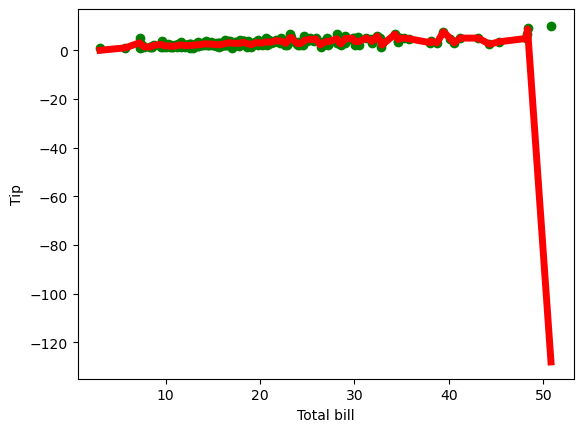

In [16]:
#10. Implement the non-parametric Locally Weighted Regression algorithm in order to fit
     #data points. Select appropriate data set for your experiment and draw graphs.
from numpy import *
import operator
from os import listdir
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy.linalg
from scipy.stats import pearsonr
def kernel(point,xmat, k):
    m,n = shape(xmat)
    weights = mat(eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = exp(diff*diff.T/(-2.0*k**2))
    return weights
def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W
def localWeightRegression(xmat,ymat,k):
    m,n = shape(xmat)
    ypred = zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
# load data points
data = pd.read_csv("C:/Users/sjcet/Gskd/MLLab/tips.csv")
bill = array(data.Total_bill)
tip = array(data.Tip)
#preparing and add 1 in bill
mbill = mat(bill)
mtip = mat(tip)
m= shape(mbill)[1]
one = mat(ones(m))
X= hstack((one.T,mbill.T))
#set k here
ypred = localWeightRegression(X,mtip,0.2)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip, color='green')
ax.plot(xsort[:,1],ypred[SortIndex], color = 'red', linewidth=5)
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show();